In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/sample_data/student-por.csv")

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [15]:
(df.isnull().sum()/len(df))*100

,0
school,0.0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
Mjob,0.0
Fjob,0.0


AttributeError: Rectangle.set() got an unexpected keyword argument 'fgsize'

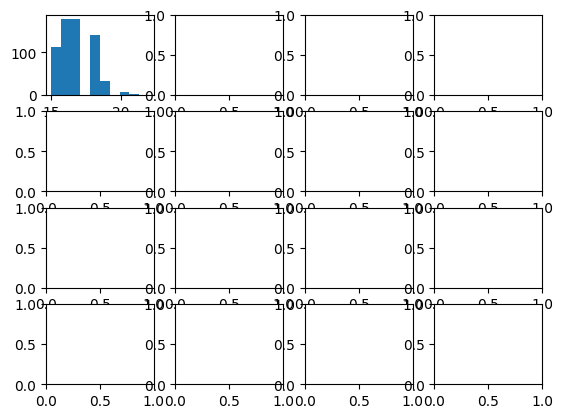

In [16]:
df.hist(fgsize=(10,6))
plt.show()

TypeError: Axes.boxplot() got an unexpected keyword argument 'fgsize'

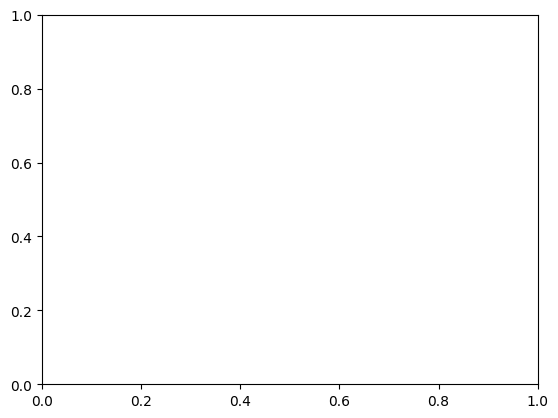

In [17]:
df.boxplot(fgsize=(10,6))
plt.xticks(rotation=90)
plt.show()

In [18]:
num_cols = df.select_dtypes(include=np.number).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))


In [19]:
df["outlier_flag"] = outliers.any(axis=1)
df["outlier_flag"].value_counts()


,count
outlier_flag,
False,393
True,256


In [20]:
df_cleaned = df[df["outlier_flag"] == False]


In [21]:
corr = df_cleaned.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.show()


ValueError: could not convert string to float: 'GP'

In [22]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
